<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/Understanding_Nolitsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount the drive

In [ ]:
cd drive/My Drive/nolitsa

/content/drive/My Drive/nolitsa


In [ ]:
cd nolitsa/examples/afn/

/content/drive/My Drive/nolitsa/examples/afn


In [ ]:
ls

 Churn_Modelling.csv    imeall/     P14-Convolutional-Neural-Networks/
'Colab Notebooks'/      LabFiles/   pandas-videos/
 fastai/                Metadise/   quip-tutorial-2018-notebooks/
'Getting started.pdf'   nolitsa/   'Sleep data'/


In [ ]:
!pip install ./nolitsa

Processing ./nolitsa
  Created wheel for nolitsa: filename=nolitsa-0.1-cp36-none-any.whl size=31135 sha256=30c3e72719ee458f8cf9299d9f2479dd38fe947103e5bd26c588ecd8cd019fcb
  Stored in directory: /tmp/pip-ephem-wheel-cache-v9m03vez/wheels/ea/c3/4d/53c94911f68e37a5b06f4e310cf9afe91349a8e2fdadbcacb7
Successfully built nolitsa


In [ ]:
#Importing the necessary library
from nolitsa import delay, dimension, utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

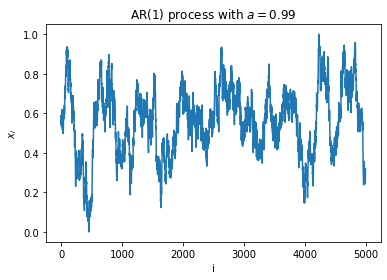

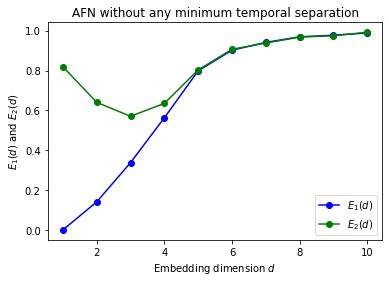

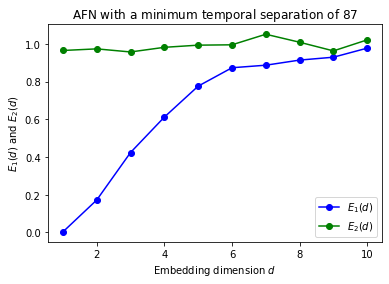

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN on correlated random time series.
The AFN algorithm is not impervious to correlated stochastic data.
Here we use a time series coming from an AR(1) process and see that the
E2(d) curve has a nontrivial appearance, falsely giving the appearance
of determinism.
Two points are to be noted:
1. Although the E2(d) curves have a nontrivial appearance, they are
   different from the curves seen for deterministic data.  Here the
   value of E2(d) first decreases with d and then increases, whereas
   for deterministic data, E2(d) is seen to increase right from the
   beginning.
2. Imposing a minimum temporal separation equal to the autocorrelation
   time of the series while searching for near neighbors solves the
   problem.
"""

from nolitsa import delay, dimension, utils
import matplotlib.pyplot as plt
import numpy as np

# Generate stochastic data.
N = 5 * 1000
x = np.empty(N) # generate a series of arbitrary number of length N

np.random.seed(999) # Fixed the seed for random number generator
eta = np.random.normal(size=(N), loc=0, scale=1.0)  # generate a series of random
                                    #number with mean 0 and standard deviation 1
a = 0.99

x[0] = eta[0]               
for i in range(1, N):
    x[i] = a * x[i - 1] + eta[i]

x = utils.rescale(x)  # rescale x into the interval default = (0,1)

# Calculate the autocorrelation time.
tau = np.argmax(delay.acorr(x) < 1.0 / np.e)

# AFN without any minimum temporal separation.
dim = np.arange(1, 10 + 2)
F, Fs = dimension.afn(x, tau=tau, dim=dim, window=0)
F1, F2 = F[1:] / F[:-1], Fs[1:] / Fs[:-1]

# AFN with a minimum temporal separation (equal to the autocorrelation
# time) between near-neighbors.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=tau, dim=dim, window=tau)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.figure(1)
plt.title(r'AR(1) process with $a = 0.99$')
plt.xlabel(r'i')
plt.ylabel(r'$x_i$')
plt.plot(x)

plt.figure(2)
plt.title(r'AFN without any minimum temporal separation')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], F1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], F2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.figure(3)
plt.title(r'AFN with a minimum temporal separation of $%d$' % tau)
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

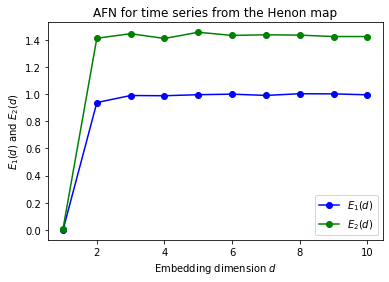

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for time series from the Henon map.
E1 saturates near an embedding dimension of 2.  E2 != 1 at many values
of d.  Thus the series is definitely deterministic.  The plot matches
Fig. 1 of Cao (1997) pretty well.
"""

from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.henon()[:, 0]

# AFN algorithm.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=1, dim=dim, window=5)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Henon map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

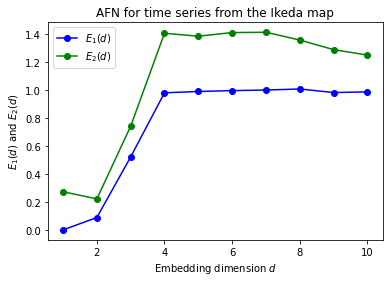

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for time series from the Ikeda map.
E1 saturates near an embedding dimension of 4.  E2 != 1 at many values
of d.  Thus, this series is definitely deterministic.  Compare with
Fig. 2 of Cao (1997).
"""

from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.ikeda()[:, 0]

# AFN algorithm.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=1, dim=dim, window=5)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Ikeda map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

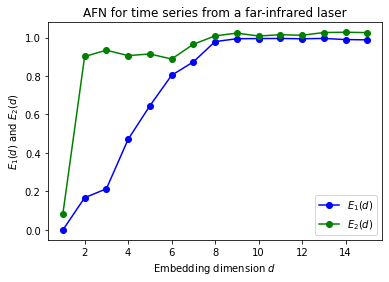

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for time series from a far-infrared laser.
The time series is from Data Set A of the Sata Fe Time Series
Competition.  This is a map-like data from a far-infrared laser.
Since each value of the time series is an 8-bit integer (i.e., it's in
the range [0, 255]), the reconstructed phase space is essentially a grid
with zero dimension.  To actually measure the dimension of this data
set, we have to "kick" points off the grid a little bit by adding an
insignificant amount of noise.  See Example 6.4 in Kantz & Schreiber
(2004).
From the E1(d) curve, one concludes that the minimum embedding dimension
should be close to 8 [Cao (1997) reports 7 as the minimum embedding
dimension].  This is somewhat surprising since this series has a very
low correlation dimension (near 2.0).
"""

from nolitsa import dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = np.loadtxt('../series/laser.dat')

# Add uniform noise in [-0.025, 0.025] to "shake" the grid.
x = x + (-0.025 + 0.050 * np.random.random(len(x)))

# AFN algorithm.
dim = np.arange(1, 15 + 2)
E, Es = dimension.afn(x, tau=1, dim=dim, window=50)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from a far-infrared laser')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

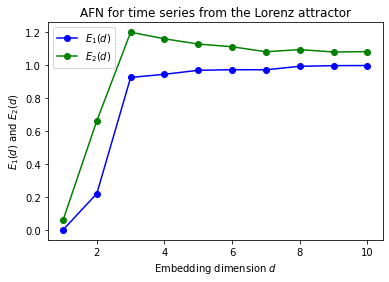

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for time series from the Lorenz attractor.
E1 saturates near an embedding dimension of 3.  E2 != 1 at many values
of d.  Thus the series is definitely deterministic.  The plot matches
Fig. 3 of Cao (1997) rather nicely.
"""

from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.lorenz()[1][:, 0]

# AFN algorithm.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=5, dim=dim, window=20)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Lorenz attractor')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

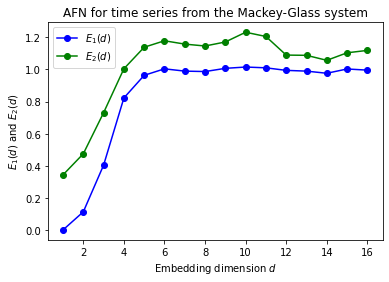

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for data from the Mackey-Glass delay differential equation.
The minimum embedding dimension comes out to be 5-7 (depending on the
initial condition) with both E1 and E2 curves giving very strong hints
of determinism.  According to Grassberger & Procaccia (1983) the
correlation dimension of the Mackey-Glass system with a delay of 23 is
~ 2.5.  Thus, the results are definitely comparable.
"""

import numpy as np
import matplotlib.pyplot as plt
from nolitsa import data, dimension

x = data.mackey_glass(tau=23.0, sample=0.46, n=1000)

# Since we're resampling the time series using a sampling step of
# 0.46, the time delay required is 23.0/0.46 = 50.
tau = 50
dim = np.arange(1, 16 + 2)

# AFN algorithm.
E, Es = dimension.afn(x, tau=tau, dim=dim, window=100)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Mackey-Glass system')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

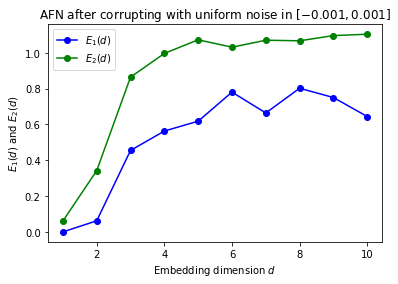

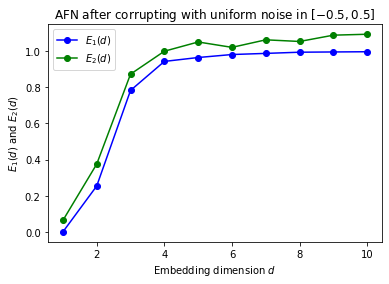

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for 8-bit time series from the Rössler oscillator.
Since each point in the time series is an 8-bit integer (i.e., it's in
the range [-127, 127]), the reconstructed phase space is essentially a
grid with zero dimension.  To actually measure the dimension of this
data set, we have to "kick" points off the grid a little bit by adding
an insignificant amount of noise.  See Example 6.4 in Kantz & Schreiber
(2004).
But the quality of reconstruction depends on the noise level.  Adding
an insignificant amount of noise does not help at all!  This is
probably one of the rare case where a higher level of additive noise
improves the results.
"""

from nolitsa import data, dimension, utils
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.roessler(length=5000)[1][:, 0]

# Convert to 8-bit.
x = np.int8(utils.rescale(x, (-127, 127)))

# Add uniform noise of two different noise levels.
y1 = x + (-0.001 + 0.002 * np.random.random(len(x)))
y2 = x + (-0.5 + 1.0 * np.random.random(len(x)))

# AFN algorithm.
dim = np.arange(1, 10 + 2)
F, Fs = dimension.afn(y1, tau=14, dim=dim, window=40)
F1, F2 = F[1:] / F[:-1], Fs[1:] / Fs[:-1]

E, Es = dimension.afn(y2, tau=14, dim=dim, window=40)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.figure(1)
plt.title(r'AFN after corrupting with uniform noise in $[-0.001, 0.001]$')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], F1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], F2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.figure(2)
plt.title(r'AFN after corrupting with uniform noise in $[-0.5, 0.5]$')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

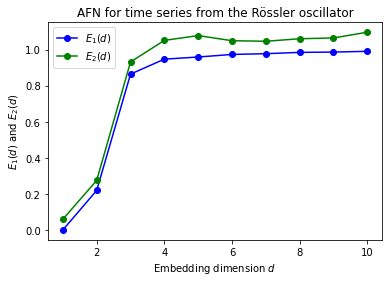

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""AFN for time series from the Rössler oscillator.
E1 saturates near an embedding dimension of 4.  E2 != 1 at many values
of d.  Thus, the series is definitely deterministic.
"""

from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.roessler()[1][:, 0]

# AFN algorithm.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=14, dim=dim, window=45, metric='cityblock')
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Rössler oscillator')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/nolitsa/d2.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  d[i] = np.linalg.lstsq(A, q)[0][0]
/usr/local/lib/python3.6/dist-packages/nolitsa/d2.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  d[i] = np.linalg.lstsq(A, q)[0][0]
/usr/local/lib/python3.6/dist-packages/nolitsa/d2.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence th

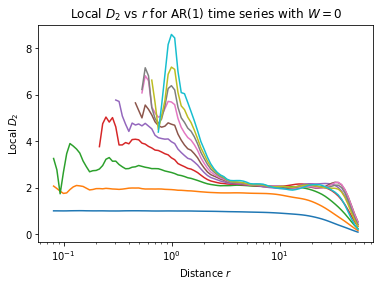

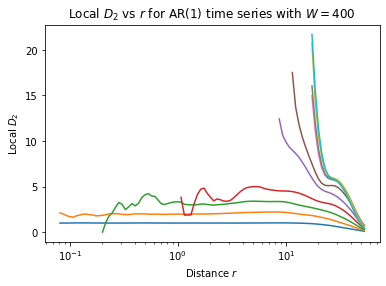

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Illustration of Theiler window using an AR(1) series.
An AR(1) time series is temporally correlated.  Thus, if a judicious
(nonzero) value of the Theiler window is not used, the estimated
dimension converges to the fractal dimension of the trajectory formed by
the time series in the phase space.  This, however, has nothing to do
with any low-dimensional nature of the underlying process.
"""

from nolitsa import d2
import numpy as np
import matplotlib.pyplot as plt

N = 5000
x = np.empty(N)
np.random.seed(882)
n = np.random.normal(size=(N), loc=0, scale=1.0)
a = 0.998

x[0] = n[0]
for i in range(1, N):
    x[i] = a * x[i - 1] + n[i]

# Delay is the autocorrelation time.
tau = 400

dim = np.arange(1, 10 + 1)

plt.figure(1)
plt.title(r'Local $D_2$ vs $r$ for AR(1) time series with $W = 0$')
plt.xlabel(r'Distance $r$')
plt.ylabel(r'Local $D_2$')

for r, c in d2.c2_embed(x, tau=tau, dim=dim, window=0):
    plt.semilogx(r[3:-3], d2.d2(r, c))

plt.figure(2)
plt.title(r'Local $D_2$ vs $r$ for AR(1) time series with $W = 400$')
plt.xlabel(r'Distance $r$')
plt.ylabel(r'Local $D_2$')

for r, c in d2.c2_embed(x, tau=tau, dim=dim, window=400):
    plt.semilogx(r[3:-3], d2.d2(r, c))

plt.show()

/usr/local/lib/python3.6/dist-packages/nolitsa/d2.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  d[i] = np.linalg.lstsq(A, q)[0][0]
/usr/local/lib/python3.6/dist-packages/nolitsa/d2.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  d[i] = np.linalg.lstsq(A, q)[0][0]
/usr/local/lib/python3.6/dist-packages/nolitsa/d2.py:185: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence th

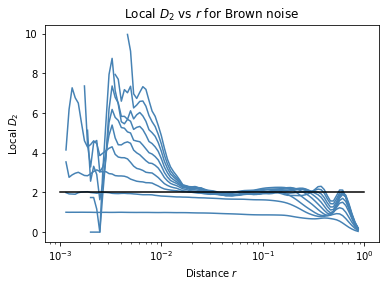

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""D2 for Brown noise.
Expected: D2 = 2 / (alpha - 1) = 2.0
Of course, this value is not due to the existence of any invariant
measure.  What is being measured here is the fractal dimension of the
Brownian trail.  The scaling region would vanish if we impose a nonzero
Theiler window, telling us that the underlying system is not
low dimensional.
"""

import numpy as np
import matplotlib.pyplot as plt
from nolitsa import d2, data, utils

np.random.seed(101)
x = utils.rescale(data.falpha(alpha=2.0, length=(2 ** 14))[:10 * 1000])

dim = np.arange(1, 10 + 1)
tau = 500

plt.title('Local $D_2$ vs $r$ for Brown noise')
plt.xlabel(r'Distance $r$')
plt.ylabel(r'Local $D_2$')

for r, c in d2.c2_embed(x, tau=tau, dim=dim, window=0,
                        r=utils.gprange(0.001, 1.0, 100)):
    plt.semilogx(r[2:-2], d2.d2(r, c, hwin=2), color='#4682B4')

plt.semilogx(utils.gprange(0.001, 1.0, 100), 2.0 * np.ones(100),
             color='#000000')
plt.show()

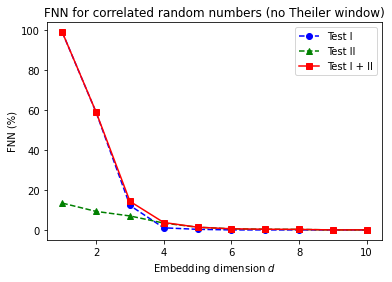

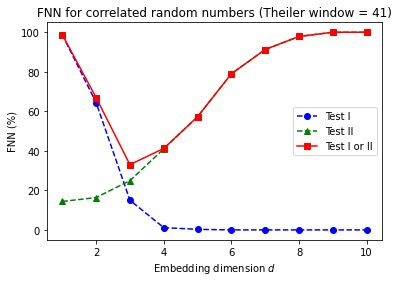

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""FNN for correlated random numbers.
Correlated random numbers are created by running a simple moving average
(with 61 bins) over uncorrelated random numbers in [0, 1].  Without
a Theiler window, the FNN fraction drops to zero soon after
d ~ log(3000) / log(10) ~ 4.0.  Ordinarily the second test would have
helped here and an increase in FNN should occur.  But here, the strong
temporal correlations between the points in the series prevent it from
working.
Of course, once we impose a Theiler window equal to the autocorrelation
time of the series, the second test reports large amounts of FNNs.
"""

from nolitsa import dimension, noise, delay
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
np.random.seed(17)
x = noise.sma(np.random.random(3000), hwin=30)

tau = np.argmax(delay.acorr(x) < 1 / np.e)

# FNN without Theiler window.
dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(x, tau=tau, dim=dim, window=0, metric='cityblock')

plt.figure(1)
plt.title(r'FNN for correlated random numbers (no Theiler window)')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.legend()

# FNN with Theiler window equal to autocorrelation time.
dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(x, tau=tau, dim=dim, window=tau, metric='cityblock')

plt.figure(2)
plt.title(r'FNN for correlated random numbers (Theiler window = %d)' % tau)
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

What does __all__ do?
It declares the semantically "public" names from a module. If there is a name in __all__, users are expected to use it, and they can have the expectation that it will not change.

It also will have programmatic affects:

import *
__all__ in a module, e.g. module.py:

__all__ = ['foo', 'Bar']
means that when you import * from the module, only those names in the __all__ are imported:

from module import *               # imports foo and Bar

In [ ]:
# Rough 1
?np.argmax

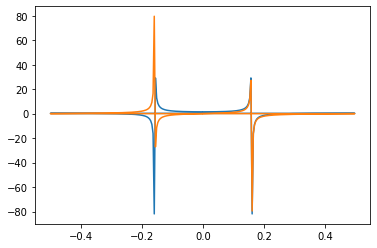

In [ ]:
# Rough 2
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [ ]:
def mi(x, y, bins=64):
    """Calculate the mutual information between two random variables.

    Calculates mutual information, I = S(x) + S(y) - S(x,y), between two
    random variables x and y, where S(x) is the Shannon entropy.

    Parameters
    ----------
    x : array
        First random variable.
    y : array
        Second random variable.
    bins : int
        Number of bins to use while creating the histogram.

    Returns
    -------
    i : float
        Mutual information.
    """
    p_x = np.histogram(x, bins)[0]
    p_y = np.histogram(y, bins)[0]
    p_xy = np.histogram2d(x, y, bins)[0].flatten()

    # Convert frequencies into probabilities.  Also, in the limit
    # p -> 0, p*log(p) is 0.  We need to take out those.
    p_x = p_x[p_x > 0] / np.sum(p_x)
    p_y = p_y[p_y > 0] / np.sum(p_y)
    p_xy = p_xy[p_xy > 0] / np.sum(p_xy)

    # Calculate the corresponding Shannon entropies.
    h_x = np.sum(p_x * np.log2(p_x))
    h_y = np.sum(p_y * np.log2(p_y))
    h_xy = np.sum(p_xy * np.log2(p_xy))

    return h_xy - h_x - h_y

In [ ]:
def dmi(x, maxtau=1000, bins=64):
    """Return the time-delayed mutual information of x_i.

    Returns the mutual information between x_i and x_{i + t} (i.e., the
    time-delayed mutual information), up to a t equal to maxtau.  Based
    on the paper by Fraser & Swinney (1986), but uses a much simpler,
    albeit, time-consuming algorithm.

    Parameters
    ----------
    x : array
        1-D real time series of length N.
    maxtau : int, optional (default = min(N, 1000))
        Return the mutual information only up to this time delay.
    bins : int
        Number of bins to use while calculating the histogram.

    Returns
    -------
    ii : array
        Array with the time-delayed mutual information up to maxtau.

    Notes
    -----
    For the purpose of finding the time delay of minimum delayed mutual
    information, the exact number of bins is not very important.
    """
    N = len(x)
    maxtau = min(N, maxtau)

    ii = np.empty(maxtau)
    ii[0] = mi(x, x, bins)

    for tau in range(1, maxtau):
        ii[tau] = mi(x[:-tau], x[tau:], bins)

    return ii

In [ ]:
# Function to calculate all the minima
def all_minima(x):
  minima_list = []
  for i in range(1,len(x)-1):
    if x[i] < x[i-1] and x[i] < x[i+1]:
      minima_list.append(x[i])

  return minima_list

# Function to calculate the local minima
def first_local_minima(minima_list):
  return minima_list[0]

allm = all_minima(mi_data)
np.where(mi_data == allm[0])

NameError: ignored

In [ ]:
data = pd.read_csv('Anil_Verma_ECG.csv')
#data = np.asarray(data[1:10**5])
data = np.squeeze(data.to_numpy(),axis = 1)
data = data.astype(float)
data = data[:10**5]
#len(data)
#len(data[:900]), len(data[99:])
#mi_data = dmi(data, maxtau = 250)
plt.plot(mi_data)
plt.show()

NameError: ignored

In [ ]:
x = data

# Compute autocorrelation and delayed mutual information.
lag = np.arange(50)
r = delay.acorr(x, maxtau=50)
i = dmi(x, maxtau=50)

r_delay = np.argmax(r < 1.0 / np.e)
i_delay = np.where(i == all_minima(i)[0])[0][0]
print(r'Autocorrelation time = %d' % r_delay)
print (r'Mutual Information time delay = %d' %i_delay)
plt.figure(1)

plt.subplot(211)
plt.title(r'Delay estimation Data')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')

plt.subplot(212)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = %d' % i_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-i_delay], x[i_delay:], '.')

plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:], '.')

plt.show()

NameError: ignored

In [ ]:
i_delay[0][0]

36

In [ ]:
x = data[:90]
y = data[9:]
bins = 64
p_x = np.histogram(x, bins)[0]
p_y = np.histogram(y, bins)[0]
p_xy = np.histogram2d(x, y, bins)[0].flatten()

ValueError: ignored